This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.

# Analyzing data with R in IPython notebook

In [1]:
%load_ext rpy2.ipython

KaveToolbox comes by default with an installation of R and extensions for python.

Here, we will use the following workflow. First, we load data from Python. Then, we use R to design and fit a model, and to make some plots in the IPython notebook. We could also load data from R, or design and fit a statistical model with Python's statsmodels package, etc. In particular, the analysis we do here could be done entirely in Python, without resorting to the R language. This recipe just shows the basics of R and illustrates how R and Python can play together within an IPython session.

1. Let's load the *longley* dataset with the statsmodels package. This dataset contains a few economic indicators in the US from 1947 to 1962. We also load the IPython R extension.

In [2]:
import statsmodels.datasets as sd
data = sd.longley.load_pandas()

2. We define `x` and `y` as the exogeneous (independent) and endogenous (dependent) variables, respectively. The endogenous variable quantifies the total employment in the country.

In [3]:
data.endog_name, data.exog_name

('TOTEMP', ['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'])

In [4]:
y, x = data.endog, data.exog

3. For convenience, we add the endogenous variable to the `x` DataFrame.

In [5]:
x['TOTEMP'] = y
x

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289,2356,1590,107608,1947,60323
1,88.5,259426,2325,1456,108632,1948,61122
2,88.2,258054,3682,1616,109773,1949,60171
3,89.5,284599,3351,1650,110929,1950,61187
4,96.2,328975,2099,3099,112075,1951,63221
5,98.1,346999,1932,3594,113270,1952,63639
6,99.0,365385,1870,3547,115094,1953,64989
7,100.0,363112,3578,3350,116219,1954,63761
8,101.2,397469,2904,3048,117388,1955,66019
9,104.6,419180,2822,2857,118734,1956,67857


4. We will make a simple plot in R. First, we need to pass Python variables to R. We can use the `%R -i var1,var2` magic. Then, we can call R's `plot` command.

In [6]:
gnp = x['GNP']
totemp = x['TOTEMP']

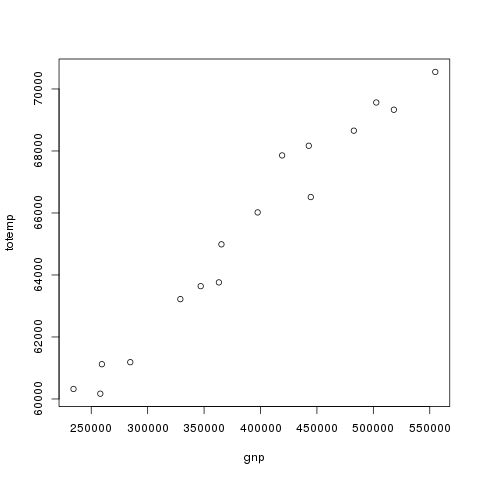

In [7]:
%R -i totemp,gnp plot(gnp, totemp)

5. Now that the data has been passed to R, we can fit a linear model to the data. The `lm` function lets us perform a linear regression. Here, we want to express `totemp` (total employement) as a function of the country's GNP.

 (Intercept)          gnp 
5.184359e+04 3.475229e-02 


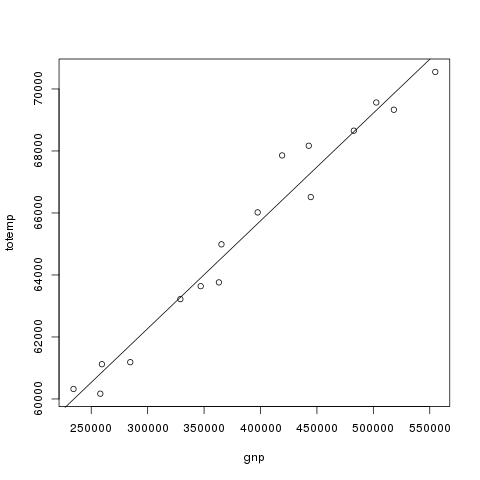

In [8]:
%%R
fit <- lm(totemp ~ gnp);  # Least-squares regression
print(fit$coefficients)  # Display the coefficients of the fit.
plot(gnp, totemp)  # Plot the data points.
abline(fit)  # And plot the linear regression.

[IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (400 pages).